In [14]:
from sklearn.metrics import log_loss, f1_score, roc_curve, auc, accuracy_score, precision_score, recall_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [1]:
data_prod = catalog.load("raw_prod")

                    INFO     Loading data from raw_prod (ParquetDataset)...                     ]8;id=207909;file:///home/rosana/.conda/envs/PD_env_1/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=124063;file:///home/rosana/.conda/envs/PD_env_1/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

In [2]:
data_prod

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
10,Jump Shot,Jump Shot,309,20000012,33.8063,-94,238,-118.3638,1,3,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,11
17,Jump Shot,Jump Shot,138,20000019,33.8183,-117,226,-118.3868,8,2,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,18
27,Jump Shot,Jump Shot,369,20000019,33.8583,-183,186,-118.4528,0,3,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,28
39,Jump Shot,Jump Shot,202,20000047,33.7723,-27,272,-118.2968,0,2,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,40
54,Jump Shot,Jump Shot,60,20000049,33.7973,-141,247,-118.4108,4,1,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-05,LAL vs. LAC,LAC,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30675,Jump Shot,Jump Shot,84,49900088,33.8283,-134,216,-118.4038,2,1,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30676
30681,Jump Shot,Jump Shot,218,49900088,33.7833,-18,261,-118.2878,0,2,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30682
30685,Jump Shot,Jump Shot,249,49900088,33.7943,81,250,-118.1888,7,3,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30686
30689,Jump Shot,Jump Shot,326,49900088,33.3653,-12,679,-118.2818,0,3,...,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30690


In [3]:
rows = data_prod.head(10).drop(columns=['shot_made_flag'])
rows

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
10,Jump Shot,Jump Shot,309,20000012,33.8063,-94,238,-118.3638,1,3,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,11
17,Jump Shot,Jump Shot,138,20000019,33.8183,-117,226,-118.3868,8,2,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,18
27,Jump Shot,Jump Shot,369,20000019,33.8583,-183,186,-118.4528,0,3,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,28
39,Jump Shot,Jump Shot,202,20000047,33.7723,-27,272,-118.2968,0,2,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,40
54,Jump Shot,Jump Shot,60,20000049,33.7973,-141,247,-118.4108,4,1,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-05,LAL vs. LAC,LAC,55
55,Jump Shot,Jump Shot,80,20000049,33.8503,-155,194,-118.4248,2,1,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-05,LAL vs. LAC,LAC,56
56,Jump Shot,Jump Shot,105,20000049,33.8163,1,228,-118.2688,11,2,...,3PT Field Goal,Center(C),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-05,LAL vs. LAC,LAC,57
59,Jump Shot,Jump Shot,199,20000049,33.8033,146,241,-118.1238,3,2,...,3PT Field Goal,Right Side Center(RC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-05,LAL vs. LAC,LAC,60
67,Jump Shot,Jump Shot,28,20000058,33.9873,231,57,-118.0388,8,1,...,3PT Field Goal,Right Side(R),Right Corner 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-07,LAL @ HOU,HOU,68
71,Jump Shot,Jump Shot,73,20000058,33.7873,7,257,-118.2628,3,1,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-07,LAL @ HOU,HOU,72


In [4]:
data_prod['playoffs'].value_counts()


playoffs
0    5544
1     882
Name: count, dtype: int64

In [5]:
data_prod['shot_type'].value_counts()


shot_type
3PT Field Goal    6426
Name: count, dtype: int64

In [6]:
data_prod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6426 entries, 10 to 30695
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         6426 non-null   object 
 1   combined_shot_type  6426 non-null   object 
 2   game_event_id       6426 non-null   int64  
 3   game_id             6426 non-null   int64  
 4   lat                 6426 non-null   float64
 5   loc_x               6426 non-null   int64  
 6   loc_y               6426 non-null   int64  
 7   lon                 6426 non-null   float64
 8   minutes_remaining   6426 non-null   int64  
 9   period              6426 non-null   int64  
 10  playoffs            6426 non-null   int64  
 11  season              6426 non-null   object 
 12  seconds_remaining   6426 non-null   int64  
 13  shot_distance       6426 non-null   int64  
 14  shot_made_flag      5412 non-null   float64
 15  shot_type           6426 non-null   object 
 16  shot_zone

In [20]:
data_processed = data_prod.dropna()

data_processed_y = data_processed[['shot_made_flag']]
data_processed_x = (data_processed[['lat', 'lon','minutes_remaining','period','playoffs','shot_distance']]
        .assign(playoffs = lambda x: x['playoffs'].astype(bool))
       )   
data_processed_x['lat_quadra'] = data_processed_x['lat'] - 34.0443
data_processed_x['lon_quadra'] = data_processed_x['lon'] + 118.2698
data_processed_x = data_processed_x.drop(columns=["lat", "lon"])

data_processed_x

,minutes_remaining,period,playoffs,shot_distance,lat_quadra,lon_quadra
10,1,3,False,25,-0.238,-0.094
17,8,2,False,25,-0.226,-0.117
27,0,3,False,26,-0.186,-0.183
39,0,2,False,27,-0.272,-0.027
55,2,1,False,24,-0.194,-0.155
...,...,...,...,...,...,...
30675,2,1,True,25,-0.216,-0.134
30681,0,2,True,26,-0.261,-0.018
30685,7,3,True,26,-0.250,0.081
30689,0,3,True,67,-0.679,-0.012


In [21]:
import pickle


with open("../data/06_models/RL_model.pkl", "rb") as file:
    rl_model = pickle.load(file)

# Check the loaded model
print(rl_model)

LogisticRegression(C=8.235, class_weight='balanced', max_iter=1000,
                   random_state=3128)


In [22]:
import pickle


with open("../data/06_models/DT_model.pkl", "rb") as file:
    dt_model = pickle.load(file)

# Check the loaded model
print(dt_model)

DecisionTreeClassifier(random_state=3128)


In [23]:
import pickle


with open("../data/06_models/best_model.pkl", "rb") as file:
    best_model = pickle.load(file)

# Check the loaded model
print(best_model)

LogisticRegression(C=8.235, class_weight='balanced', max_iter=1000,
                   random_state=3128)


In [24]:
rl_prod_predictions = rl_model.predict(data_processed_x)
print(rl_prod_predictions) 

rl_prod_probabilities = rl_model.predict_proba(data_processed_x)[:, 1]
print(rl_prod_probabilities)  

[0. 0. 0. ... 0. 0. 0.]
[0.36602181 0.36920003 0.33090937 ... 0.3497439  0.10289385 0.34563519]


In [25]:
dt_prod_predictions = dt_model.predict(data_processed_x)
print(dt_prod_predictions) 

dt_prod_probabilities = dt_model.predict_proba(data_processed_x)[:, 1]
print(dt_prod_probabilities)  

[0. 1. 1. ... 1. 1. 0.]
[0. 1. 1. ... 1. 1. 0.]


In [27]:
print(data_processed_y)

       shot_made_flag
10                0.0
17                1.0
27                0.0
39                1.0
55                0.0
...               ...
30675             0.0
30681             1.0
30685             0.0
30689             0.0
30695             0.0

[5412 rows x 1 columns]


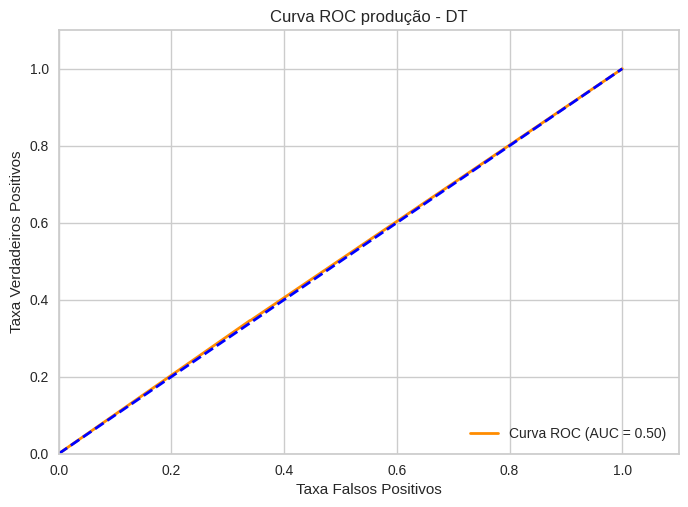

In [26]:
fpr, tpr, _ = roc_curve(data_processed_y, dt_prod_probabilities)
roc_auc = auc(fpr, tpr)
    
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.10])
plt.ylim([0.0, 1.10])
plt.xlabel('Taxa Falsos Positivos')
plt.ylabel('Taxa Verdadeiros Positivos')
plt.title(f'Curva ROC produção - DT')
plt.legend(loc="lower right")
    
plt.show()

In [13]:
import requests
import pandas as pd
import numpy as np

# Carregamos os dados de produção
data_prod_ok = data_prod.replace([np.inf, -np.inf], 1e10).fillna(0)

# Limitamos a 10 registros para teste
sample_data = data_prod_ok

# Formato esperado pelo MLflow 2.0+
payload = {
    "dataframe_split": {
        "columns": sample_data.columns.tolist(),
        "data": sample_data.values.tolist()
    }
}

# Enviamos a requisição
resp = requests.post(
    'http://127.0.0.1:5002/invocations',
    json=payload,
    headers={"Content-Type": "application/json"}
)

print(f"Status code: {resp.status_code}")
if resp.status_code == 200:
    print(f"Resposta: {resp.json()}")
else:
    print(f"Erro: {resp.text}")

data_prod

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /home/rosana/.conda/envs/PD_env_1/lib/python3.11/site-packages/urllib3/connection.py:198 in      │
│ _new_conn                                                                                        │
│                                                                                                  │
│    195 │   │   :return: New socket connection.                                                   │
│    196 │   │   """                                                                               │
│    197 │   │   try:                                                                              │
│ ❱  198 │   │   │   sock = connection.create_connection(                                          │
│    199 │   │   │   │   (self._dns_host, self.port),                                              │
│    200 │   │   │   │   self.timeout,                                                             │
│    201 │   │   │   │   source_address=self.source_address,                                       │
│                                                                                                  │
│ /home/rosana/.conda/envs/PD_env_1/lib/python3.11/site-packages/urllib3/util/connection.py:85 in  │
│ create_connection                                                                                │
│                                                                                                  │
│    82 │                                                                                          │
│    83 │   if err is not None:                                                                    │
│    84 │   │   try:                                                                               │
│ ❱  85 │   │   │   raise err                                                                      │
│    86 │   │   finally:                                                                           │
│    87 │   │   │   # Break explicitly a reference cycle                                           │
│    88 │   │   │   err = None                                                                     │
│                                                                                                  │
│ /home/rosana/.conda/envs/PD_env_1/lib/python3.11/site-packages/urllib3/util/connection.py:73 in  │
│ create_connection                                                                                │
│                                                                                                  │
│    70 │   │   │   │   sock.settimeout(timeout)                                                   │
│    71 │   │   │   if source_address:                                                             │
│    72 │   │   │   │   sock.bind(source_address)                                                  │
│ ❱  73 │   │   │   sock.connect(sa)                                                               │
│    74 │   │   │   # Break explicitly a reference cycle                                           │
│    75 │   │   │   err = None                                                                     │
│    76 │   │   │   return sock                                                                    │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /home/rosana/.conda/envs/PD_env_1/lib/python3.11/site-packages/urllib3/connectionpool.py:787 in  │
│ urlopen                                                                                          │
│                                                                                                  │
│    784 │   │   │   response_conn =

In [ ]:
# Verificar as colunas do DataFrame
print("Colunas no DataFrame:", data_prod.columns.tolist())

# Verificar se todas as colunas necessárias estão presentes
colunas_necessarias = ['lat', 'lon', 'minutes_remaining', 'period', 'playoffs', 'shot_distance']
colunas_faltando = [col for col in colunas_necessarias if col not in data_prod.columns]
if colunas_faltando:
    print(f"Atenção: as seguintes colunas estão faltando: {colunas_faltando}")
else:
    print("Todas as colunas necessárias estão presentes")

In [ ]:
import pickle


with open("../data/06_models/best_model.pkl", "rb") as file:
    model = pickle.load(file)

# Check the loaded model
print(model)

In [ ]:

data_dev = catalog.load("raw_dev")

data_dev_filtered = (data_dev[['lat', 'lon','minutes_remaining','period','playoffs','shot_distance']]
        # .assign(playoffs = lambda x: x['playoffs'].astype(bool))
        )        
if "playoffs" in data_dev_filtered.columns:
    data_dev_filtered["playoffs"] = data_dev_filtered["playoffs"].astype(bool)
        
if {"lat", "lon"}.issubset(data_dev_filtered.columns):
    data_dev_filtered["lat_quadra"] = data_dev_filtered["lat"] - 34.0443
    data_dev_filtered["lon_quadra"] = data_dev_filtered["lon"] + 118.2698
    data_dev_filtered = data_dev_filtered.drop(columns=["lat", "lon"])
        
print(data_dev_filtered)


data_prod_filtered = (data_prod[['lat', 'lon','minutes_remaining','period','playoffs','shot_distance']]
        # .assign(playoffs = lambda x: x['playoffs'].astype(bool))
        )        
if "playoffs" in data_prod_filtered.columns:
    data_prod_filtered["playoffs"] = data_prod_filtered["playoffs"].astype(bool)
        
if {"lat", "lon"}.issubset(data_prod_filtered.columns):
    data_prod_filtered["lat_quadra"] = data_prod_filtered["lat"] - 34.0443
    data_prod_filtered["lon_quadra"] = data_prod_filtered["lon"] + 118.2698
    data_prod_filtered = data_prod_filtered.drop(columns=["lat", "lon"])
        
print(data_prod_filtered)
print('shot_distance_dev')
print(data_dev_filtered['shot_distance'].value_counts())
print('shot_distance_prod')
print(data_prod_filtered['shot_distance'].value_counts())

In [ ]:
import matplotlib.pyplot as plt

# Supondo que 'data_dev_filtered' seja um DataFrame do Pandas
plt.hist(data_dev_filtered['shot_distance'], bins=30, edgecolor='black')

plt.xlabel('Distância do Shot - DEV')
plt.ylabel('Frequência')
plt.title('Histograma de Distância do Shot - DEV')

plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Supondo que 'data_dev_filtered' seja um DataFrame do Pandas
plt.hist(data_prod_filtered['shot_distance'], bins=30, edgecolor='black')

plt.xlabel('Distância do Shot - PROD')
plt.ylabel('Frequência')
plt.title('Histograma de Distância do Shot - PROD')

plt.show()

In [ ]:
import numpy as np

prediction_dev = model.predict(data_dev_filtered)
prediction_prod = model.predict(data_prod_filtered)

print(prediction_dev[0:30])
print(prediction_prod[0:30])

In [ ]:
data_dev['shot_type'].value_counts()

In [ ]:
data_prod['shot_type'].value_counts()